['IMU_Data_Time', 'CHEST_Accel_X', 'CHEST_Accel_Y', 'CHEST_Accel_Z', 'CHEST_Gyro_X', 'CHEST_Gyro_Y', 'CHEST_Gyro_Z', 'CHEST_Mag_X', 'CHEST_Mag_Y', 'CHEST_Mag_Z', 'CHEST_Quat_1', 'CHEST_Quat_2', 'CHEST_Quat_3', 'CHEST_Quat_4', 'WAIST_Accel_X', 'WAIST_Accel_Y', 'WAIST_Accel_Z', 'WAIST_Gyro_X', 'WAIST_Gyro_Y', 'WAIST_Gyro_Z', 'WAIST_Mag_X', 'WAIST_Mag_Y', 'WAIST_Mag_Z', 'WAIST_Quat_1', 'WAIST_Quat_2', 'WAIST_Quat_3', 'WAIST_Quat_4', 'R_THIGH_Accel_X', 'R_THIGH_Accel_Y', 'R_THIGH_Accel_Z', 'R_THIGH_Gyro_X', 'R_THIGH_Gyro_Y', 'R_THIGH_Gyro_Z', 'R_THIGH_Mag_X', 'R_THIGH_Mag_Y', 'R_THIGH_Mag_Z', 'R_THIGH_Quat_1', 'R_THIGH_Quat_2', 'R_THIGH_Quat_3', 'R_THIGH_Quat_4', 'R_SHANK_Accel_X', 'R_SHANK_Accel_Y', 'R_SHANK_Accel_Z', 'R_SHANK_Gyro_X', 'R_SHANK_Gyro_Y', 'R_SHANK_Gyro_Z', 'R_SHANK_Mag_X', 'R_SHANK_Mag_Y', 'R_SHANK_Mag_Z', 'R_SHANK_Quat_1', 'R_SHANK_Quat_2', 'R_SHANK_Quat_3', 'R_SHANK_Quat_4', 'R_FOOT_Accel_X', 'R_FOOT_Accel_Y', 'R_FOOT_Accel_Z', 'R_FOOT_Gyro_X', 'R_FOOT_Gyro_Y', 'R_FOOT_Gy

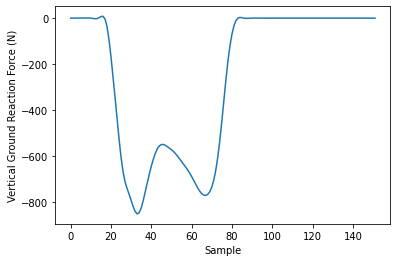

In [2]:
import h5py
import os
import json
import matplotlib.pyplot as plt

import sys
sys.path.append("./../")

from vicon_imu_data_process.const import DATA_PATH, SAMPLE_FREQUENCY
walking_data_path = DATA_PATH

if __name__ == '__main__':
    with h5py.File(os.path.join(walking_data_path,'all_17_subjects.h5'), 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

    data_subject_01 = data_all_sub['subject_01']
    index_ = data_fields.index('plate_2_force_z')

    plt.figure()
    plt.plot(data_subject_01[:1, :, index_].ravel())
    ax = plt.gca()
    ax.set_xlabel('Sample')
    ax.set_ylabel('Vertical Ground Reaction Force (N)')
    plt.show()

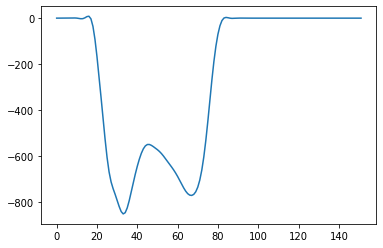

In [146]:
plt.plot(data_all_sub['subject_01'][0,:,index_])

In [ ]:
subjects_trials_data={}
for subject_id_name in data_all_sub.items():
    subjects_trials[subject_id_name]=[]

In [147]:
print(data_fields)
print(data_all_sub.keys())

['body weight', 'body height', 'force_phase', 'EXT_KM_X', 'EXT_KM_Y', 'EXT_KM_Z', 'AccelX_L_FOOT', 'AccelY_L_FOOT', 'AccelZ_L_FOOT', 'GyroX_L_FOOT', 'GyroY_L_FOOT', 'GyroZ_L_FOOT', 'MagX_L_FOOT', 'MagY_L_FOOT', 'MagZ_L_FOOT', 'Quat1_L_FOOT', 'Quat2_L_FOOT', 'Quat3_L_FOOT', 'Quat4_L_FOOT', 'AccelX_R_FOOT', 'AccelY_R_FOOT', 'AccelZ_R_FOOT', 'GyroX_R_FOOT', 'GyroY_R_FOOT', 'GyroZ_R_FOOT', 'MagX_R_FOOT', 'MagY_R_FOOT', 'MagZ_R_FOOT', 'Quat1_R_FOOT', 'Quat2_R_FOOT', 'Quat3_R_FOOT', 'Quat4_R_FOOT', 'AccelX_R_SHANK', 'AccelY_R_SHANK', 'AccelZ_R_SHANK', 'GyroX_R_SHANK', 'GyroY_R_SHANK', 'GyroZ_R_SHANK', 'MagX_R_SHANK', 'MagY_R_SHANK', 'MagZ_R_SHANK', 'Quat1_R_SHANK', 'Quat2_R_SHANK', 'Quat3_R_SHANK', 'Quat4_R_SHANK', 'AccelX_R_THIGH', 'AccelY_R_THIGH', 'AccelZ_R_THIGH', 'GyroX_R_THIGH', 'GyroY_R_THIGH', 'GyroZ_R_THIGH', 'MagX_R_THIGH', 'MagY_R_THIGH', 'MagZ_R_THIGH', 'Quat1_R_THIGH', 'Quat2_R_THIGH', 'Quat3_R_THIGH', 'Quat4_R_THIGH', 'AccelX_WAIST', 'AccelY_WAIST', 'AccelZ_WAIST', 'GyroX_WAIST

In [38]:
import re
import copy
import sys
sys.path.append("./../")
from vicon_imu_data_process.const import DATA_PATH, SAMPLE_FREQUENCY
import pandas as pd
import numpy as np
from vicon_imu_data_process.process_rawdata import *
from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS


'''
Translate data fields
'''

def interpret_data_fields():
    interpreted_data_fields = copy.deepcopy(data_fields)
    for idx, field in enumerate(data_fields):
        # translate imu data fields
        if(re.search(r'X_|Y_|Z_|Quat', field)!=None):
            y = field.split('_')
            temp = y[1:];temp.append(y[0])
            w = '_'.join(temp)
            l = re.search(r'X|Y|Z|[1-4]$',w).group()
            result = w[:-1]+'_'+l
            interpreted_data_fields[idx] = result
        # translate knee moment
        if(re.search(r'EXT_KM', field)!=None):
            l = re.search(r'_X|_Y|_Z$',field).group()
            result = 'R_KNEE_MOMENT'+l
            interpreted_data_fields[idx] = result
        # translate groudn reaction force data field
        if(re.search(r'_force_', field)!=None):
            direction = re.search(r'x|y|z$',field).group()
            left_right_feet = re.search(r'[1|2]',field).group()
            result = ('L_GRF_' if left_right_feet == '1' else 'R_GRF_') + direction.upper()
            interpreted_data_fields[idx] = result
        
            
    return interpreted_data_fields



'''
Translate the walking data format into drop landing data format

'''
def interpret_data_format():
    interpreted_subjects_trials_data = {}
    
    with h5py.File(os.path.join(walking_data_path,'all_17_subjects.h5'), 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])
        data_subject_01 = data_all_sub['subject_01']
    
    data_fields_index = [1,4,6]
    
    
    interpreted_data_fields = interpret_data_fields()
    print(interpret_data_fields)
    selected_data_fields = FEATURES_FIELDS+ LABELS_FIELDS
    selected_data_fields_index = []
    for field in selected_data_fields:
        selected_data_fields_index.append(interpreted_data_fields.index(field))
    
    for subject_id_name, subject_data in data_all_sub.items():
        interpreted_subjects_trials_data[subject_id_name] = {}
        for trial_idx in range(subject_data.shape[0]):
            a_trial_data = subject_data[trial_idx, :, selected_data_fields_index].T
            pd_a_trial_data = pd.DataFrame(data=a_trial_data,columns=selected_data_fields)
            time = np.linspace(0,a_trial_data.shape[0]/SAMPLE_FREQUENCY,a_trial_data.shape[0])
            pd_a_trial_data['TIME']  = time
            interpreted_subjects_trials_data[subject_id_name][str(trial_idx)] = pd_a_trial_data
            
    return interpreted_subjects_trials_data


            

results = interpret_data_format()
save_subjects_dataset_to_a_h5(results,"walking_data.hdf5")


        

<function interpret_data_fields at 0x7f44fd357c10>


In [19]:
set(selected_data_fields).difference(set(interpreted_data_fields))

set()

In [30]:


x = np.array([[1,2,3,3],[4,5,6,6]])
print(x)
print(x[:,[1,3]])

[[1 2 3 3]
 [4 5 6 6]]
[[2 3]
 [5 6]]


In [97]:
interpreted_subjects_trials_data['subject_01']['1'].shape

(152, 256)